# # **키친솔루션 KAMP 머신러닝 강의2 소스 코드2**

## *8장 다중회귀와 분류*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저서 : 으뜸 데이터 분석과 머신러닝"(개정판)
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 8.3 기대수명 데이터 둘러보기

In [4]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'

life = pd.read_csv(file)
print(life.head(3))

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0         

In [2]:
print('기대수명 데이터의 개요:')
print(life.describe())

기대수명 데이터의 개요:
              Year  Life expectancy  Adult mortality  Infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.0

In [3]:
print('life 데이터의 컬럼들')
print(life.columns)

life 데이터의 컬럼들
Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


<Axes: >

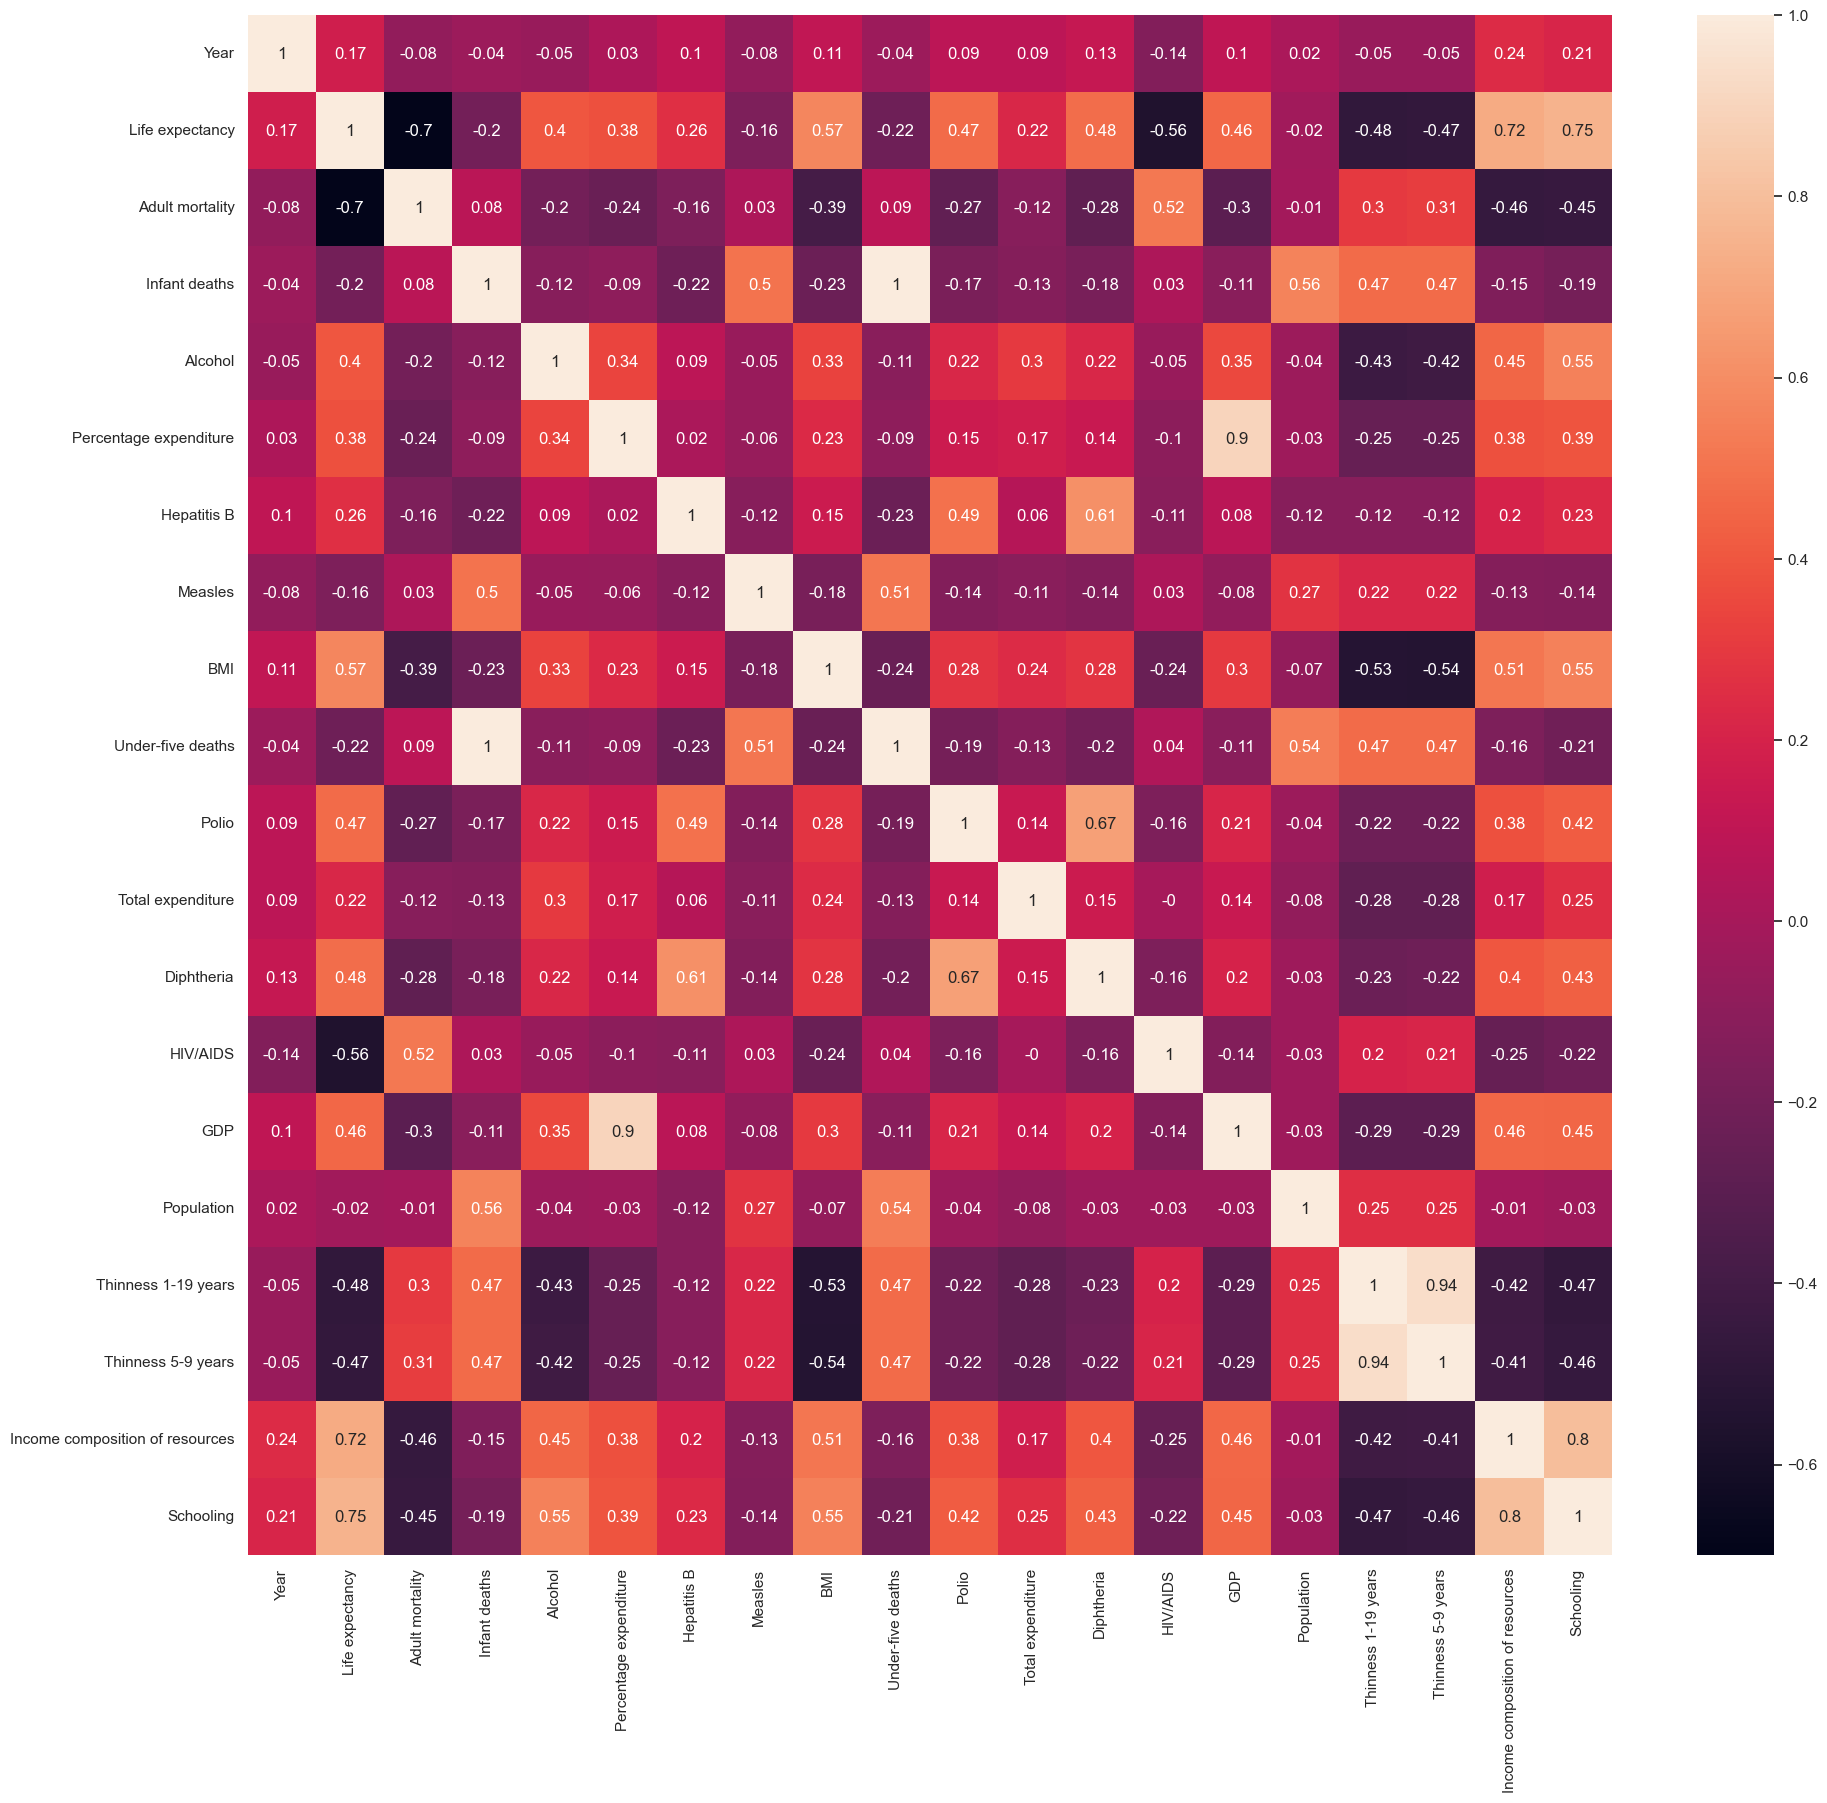

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시본 라이브러리의 크기를 지정
sns.set(rc={'figure.figsize':(22,20)})
# 상관행렬을 나타내어보자. 이때 수치 데이터에 대한 상관계수를 구하도록 하자
correlation_matrix = life.corr(numeric_only=True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 8.4 기대수명과 상관도가 높은 데이터는 무엇인가

In [5]:
print("기대수명과의 상관계수")
print(life.corr(numeric_only=True).round(3)['Life expectancy'])

기대수명과의 상관계수
Year                               0.170
Life expectancy                    1.000
Adult mortality                   -0.696
Infant deaths                     -0.197
Alcohol                            0.405
Percentage expenditure             0.382
Hepatitis B                        0.257
Measles                           -0.158
BMI                                0.568
Under-five deaths                 -0.223
Polio                              0.466
Total expenditure                  0.218
Diphtheria                         0.479
HIV/AIDS                          -0.557
GDP                                0.461
Population                        -0.022
Thinness 1-19 years               -0.477
Thinness 5-9 years                -0.472
Income composition of resources    0.725
Schooling                          0.752
Name: Life expectancy, dtype: float64


In [6]:
import numpy as np

# 'Life expectancy'와 다른 속성들의 소수점 둘째 자리 상관계수를 구함
c = life.corr(numeric_only=True).round(2)['Life expectancy']
c = np.abs(c)       # 상관계수의 절대값을 취한다
print(c.sort_values(ascending=False)[1:8]) # 상위 7개 값을 출력하자

Schooling                          0.75
Income composition of resources    0.72
Adult mortality                    0.70
BMI                                0.57
HIV/AIDS                           0.56
Diphtheria                         0.48
Thinness 1-19 years                0.48
Name: Life expectancy, dtype: float64


In [7]:
print('Life expectancy와 상관도 순서로 정렬 후 하위 5개 값')
print(c.sort_values(ascending=False)[-6:-1]) # 하위 5개 슬라이싱

Life expectancy와 상관도 순서로 정렬 후 하위 5개 값
Under-five deaths    0.22
Total expenditure    0.22
Infant deaths        0.20
Year                 0.17
Measles              0.16
Name: Life expectancy, dtype: float64


### 8.5 쌍그래프로 특성 분석하기

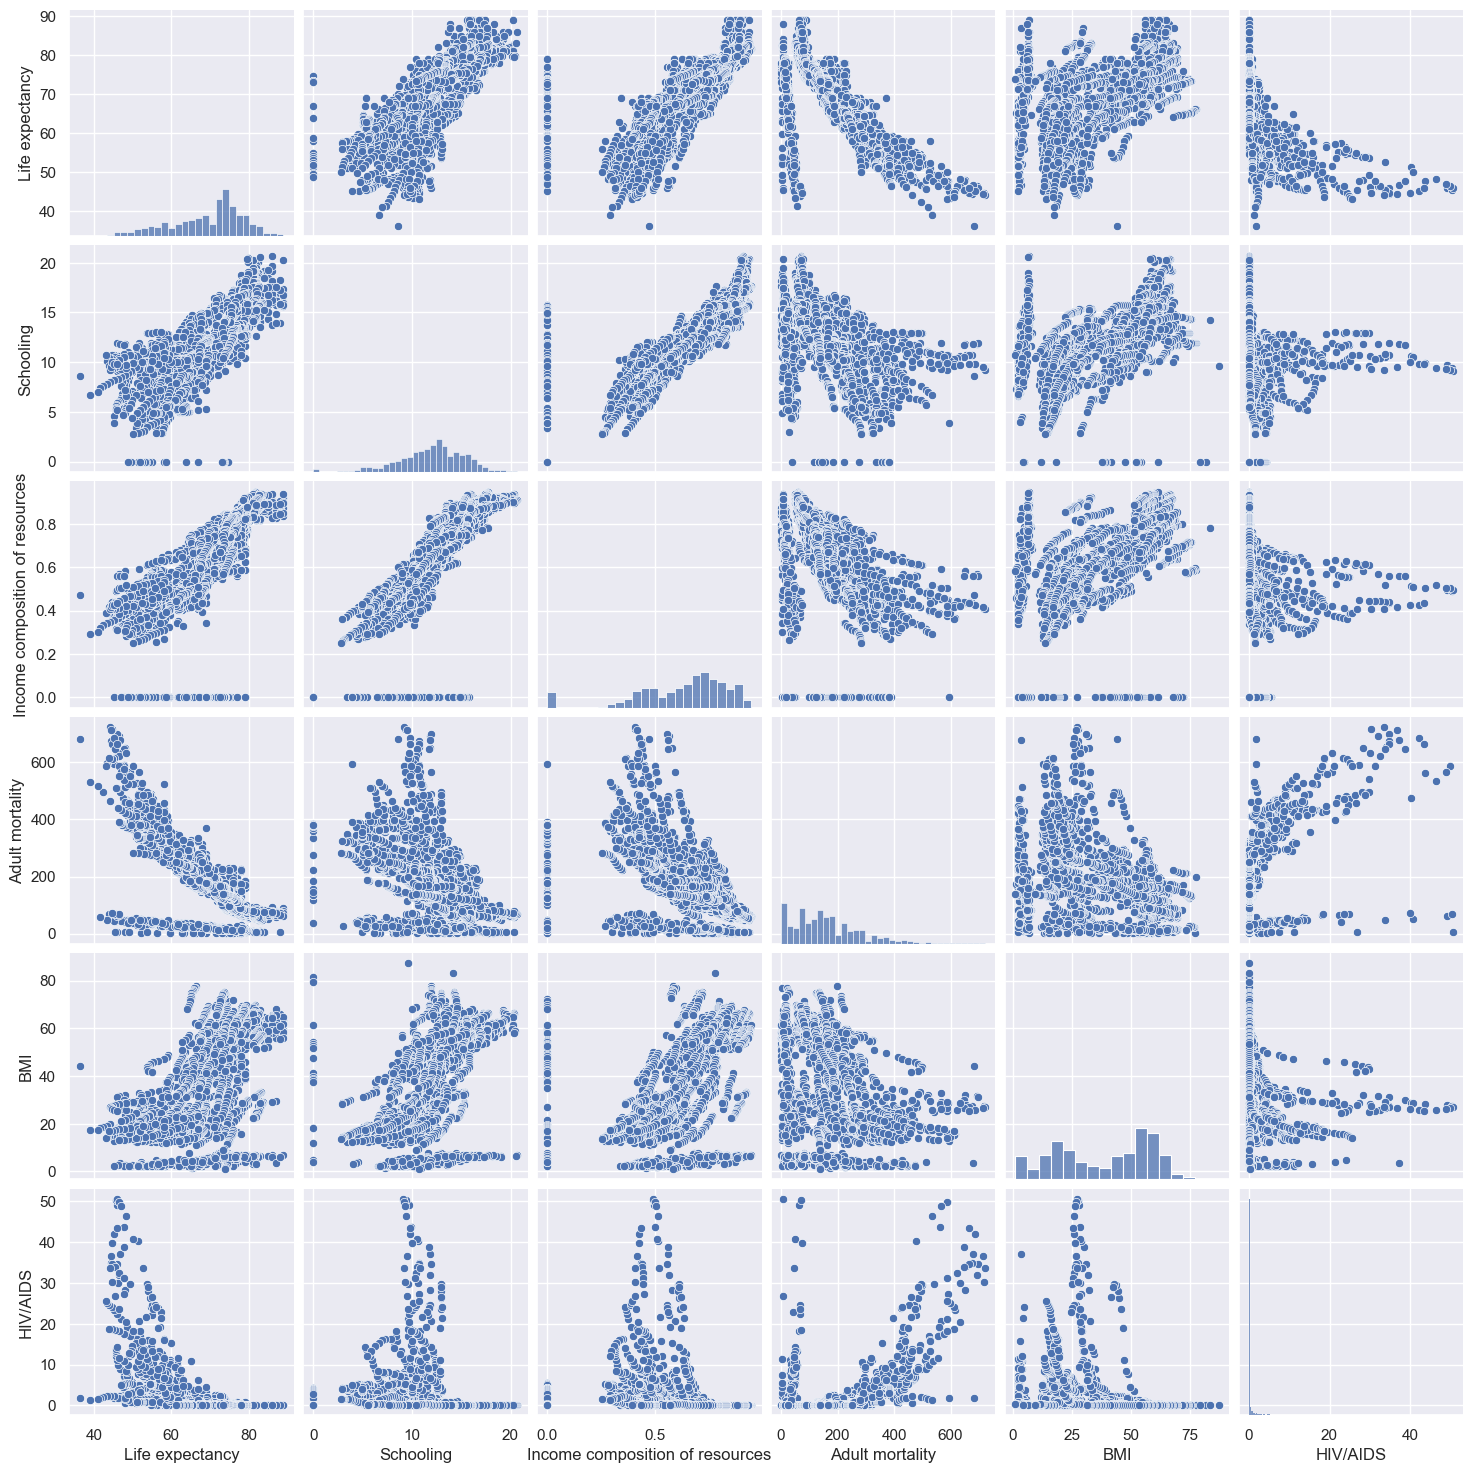

In [8]:
sns.pairplot(life[['Life expectancy', 'Schooling',\
                  'Income composition of resources',\
                  'Adult mortality', 'BMI', 'HIV/AIDS']])
plt.show()

In [9]:
life.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
Thinness 5-9 years                  34
Thinness 1-19 years                 34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult mortality                     10
HIV/AIDS                             0
Country                              0
Year                                 0
Measles                              0
Percentage expenditure               0
Infant deaths                        0
Status                               0
Under-five deaths                    0
dtype: int64

In [9]:
main_features = ['Schooling',\
                 'Income composition of resources',\
                 'Adult mortality', 'BMI', 'HIV/AIDS']
life[main_features].isna().sum()

Schooling                          0
Income composition of resources    0
Adult mortality                    0
BMI                                0
HIV/AIDS                           0
dtype: int64

In [10]:
life.dropna(inplace=True) # 결측값 제거

X = life[main_features]
y = life['Life expectancy']
print(X.shape, y.shape ) # 결측값 제거 후 X, y 차원크기

(1649, 5) (1649,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    random_state=84,\
                                                    test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형 회귀 모델의 점수=', f"{regr.score(X_test, y_test):.3f}")


선형 회귀 모델의 점수= 0.819


### 책에 없음 : 선형회귀 그래프를 시각적으로 확인하는 코드

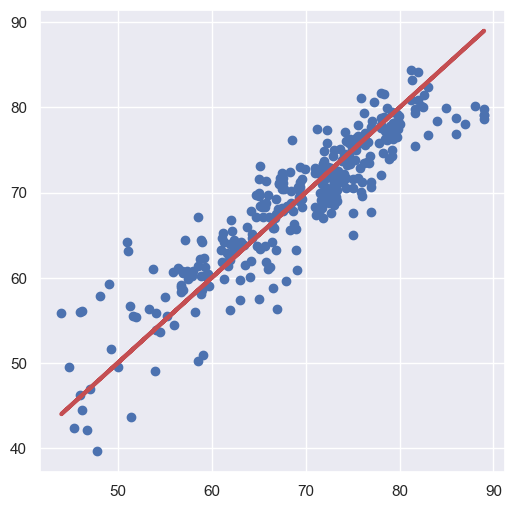

In [13]:
plt.figure(figsize=(6,6))
y_test_predict = regr.predict(X_test)
plt.scatter(y_test, y_test_predict)
plt.plot(y_test, y_test, color='r', linewidth=3)

### 8.6 훈련 데이터, 검증 데이터 그리고 특성

In [14]:
import pandas as pd

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'
life = pd.read_csv(file)

life.dropna(inplace=True) # 결측값 제거
# 'Country', 'Year', 'Status', 'Life expectancy'를 제외한 속성 사용
X = life[['Year','Adult mortality','Infant deaths', 'Alcohol',\
          'Percentage expenditure','Hepatitis B', 'Measles',\
          'BMI', 'Under-five deaths', 'Polio',\
          'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP',\
          'Population','Thinness 1-19 years','Thinness 5-9 years',\
          'Income composition of resources', 'Schooling']]
y = life['Life expectancy']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    random_state=84,\
                                                    test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('선형회귀 모델의 점수 =', f"{regr.score(X_test, y_test):.3f}")

선형회귀 모델의 점수 = 0.834


### LAB 8-1 : 상관도를 시각화하여 중요 특성을 분석하자.

Text(0, 0.5, 'Correlation Coef')

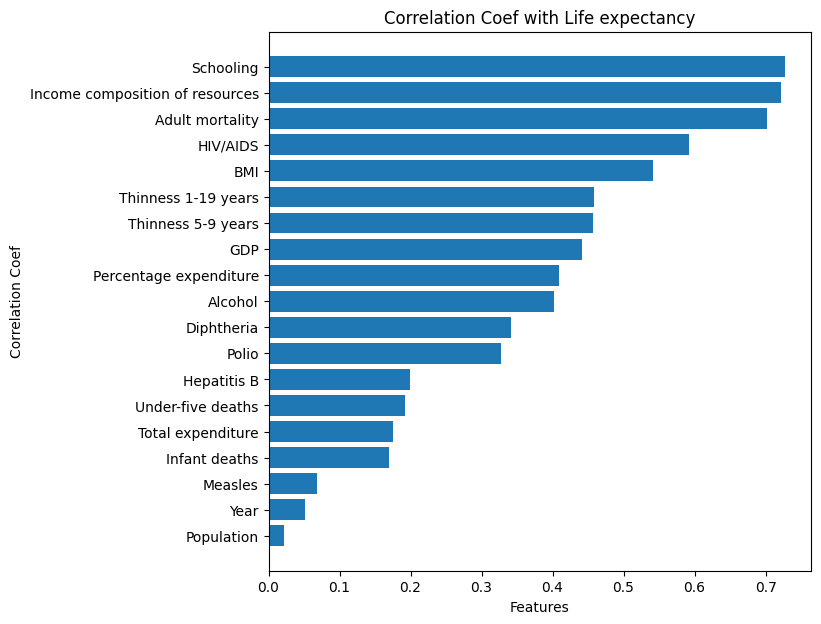

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path+'life_expectancy.csv'

life = pd.read_csv(file)
life.dropna(inplace=True) # 결측값 제거
# 'Country', 'Status', 'Life expectancy'를 제외한 속성 사용
X = life[['Year','Adult mortality','Infant deaths', 'Alcohol',\
         'Percentage expenditure','Hepatitis B', 'Measles',\
         'BMI', 'Under-five deaths', 'Polio',\
         'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP',\
         'Population','Thinness 1-19 years','Thinness 5-9 years',\
         'Income composition of resources', 'Schooling']]

# 'Life expectancy'와 다른 속성들의 상관계수를 구함
c = life.corr(numeric_only=True)['Life expectancy']
c = np.abs(c)       # 상관계수의 절대값을 취한다
c.sort_values(ascending=True, inplace=True)
c = c[:-1] # 제일 뒤에 있는 Life expectancy는 제거

plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)
plt.title('Correlation Coef with Life expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation Coef')

### 8.7 데이터의 분포가 직선이 아니라면? 다항 회귀 모델을 사용하자

#### 다항회귀 테스트를 위하여 2차 방정식으로 비선형 데이터를 임의로 만들

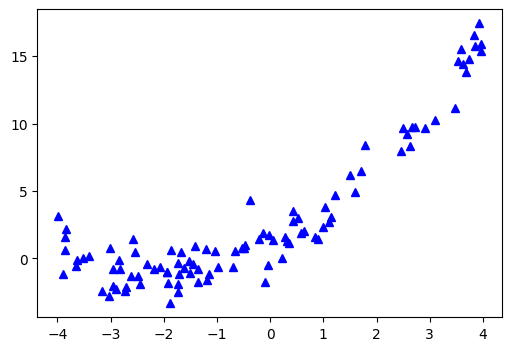

In [18]:
import numpy as np
import matplotlib.pyplot as plt

m = 100    # 생성할 데이터의 개수
# 평균값이 0이고 -4에서 4사이에 분포하는 랜덤 값 X
np.random.seed(84)   # 매번 동일한 결과를 얻기 위하여 시드를 84로 부여하자
X = 8 * np.random.rand(m, 1) - 4
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b^")

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr = LinearRegression()
regr.fit(X, y)
print('선형회귀 모델의 점수 =', f"{regr.score(X, y):.3f}")
print('선형회귀 모델의 계수와 절편 =', regr.coef_, regr.intercept_)

ModuleNotFoundError: No module named 'sklearn'

In [14]:
plt.figure(figsize=(7,6))
y_predict = regr.predict(X)
plt.scatter(X, y)
plt.plot(X.flatten(), y_predict, color='r')

NameError: name 'regr' is not defined

<Figure size 700x600 with 0 Axes>

### 8.8 다항 회귀 모델을 사용하자

In [19]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

t = np.arange(6).reshape(3, -1)   # 간단한 샘플 데이터 t를 생성(2차원)
print(t)

[[0 1]
 [2 3]
 [4 5]]


In [21]:
poly = PolynomialFeatures(degree=2)       # 디폴트 degree=2임
new_t = poly.fit_transform(t)
print(new_t)        # t에 대하여 다항 특성을 추가하고 이를 출력해 보자

[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [22]:
print(poly.get_feature_names_out())

['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 8.7 절의 데이터 X
m = 100    # 생성할 데이터의 갯수
# 평균값이 0이고 -4에서 4사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4
# x^2항의 계수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 2,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)
print('다항 회귀 모델의 점수 =', f"{regr.score(X_poly, y):.3f}")
print('다항 회귀 모델의 계수 =', regr.coef_, '절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 0.951
다항 회귀 모델의 계수 = [[1.921181   0.48117081]] 절편 = [1.12674516]


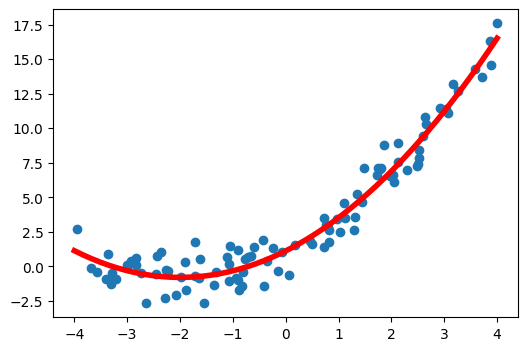

In [24]:
# -4에서 4사이의 데이터를 생성하자.
domain = np.linspace(-4, 4, 50).reshape(-1, 1)
# domain 데이터에 2차 다항 특성을 추가한 domain_2를 만들자
domain_2 = poly_features.fit_transform(domain)
plt.figure(figsize=(6,4))
y_predict = regr.predict(domain_2)
plt.scatter(X, y)
plt.plot(domain, y_predict, color='r', linewidth=4)

### LAB 8-2 : 3차 방정식을 만들고 다항 회귀 모델을 이용하여 예측하기

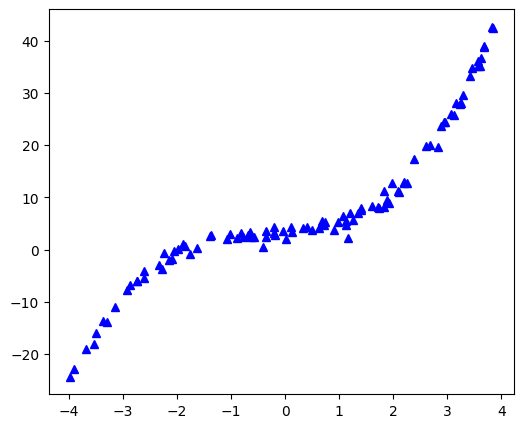

In [25]:
# 2개의 변곡점을 가진 데이터를 생성하고 시각화하는 코드
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)
plt.figure(figsize=(6,5))
plt.plot(X, y, "b^")

다항 회귀 모델의 점수 = 0.995
다항 회귀 모델의 계수 = [[0.9031199  0.48195941 0.51178737]]
절편 = [3.30889681]


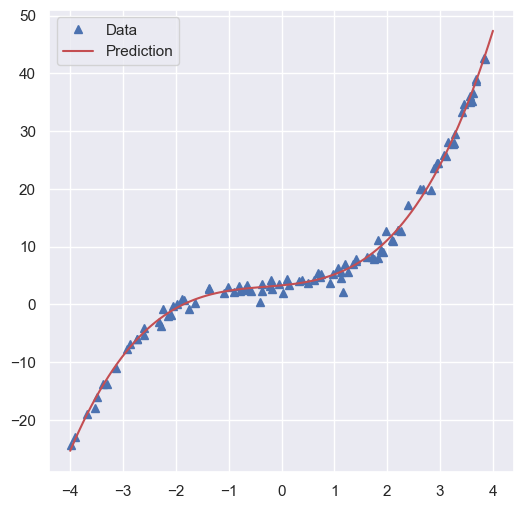

In [28]:
# 다항 회귀 모델을 만들고 점수와 계수, 절편을 출력하는 코드
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 3,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)

print('다항 회귀 모델의 점수 =', f"{regr.score(X_poly, y):.3f}")
print('다항 회귀 모델의 계수 =', regr.coef_)
print('절편 =', regr.intercept_)

# 다항 회귀 곡선을 생성하는 기능
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(6,6))
plt.plot(X, y, "b^", label='Data')
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.legend()

### 8.9 과대 적합에 주의하자

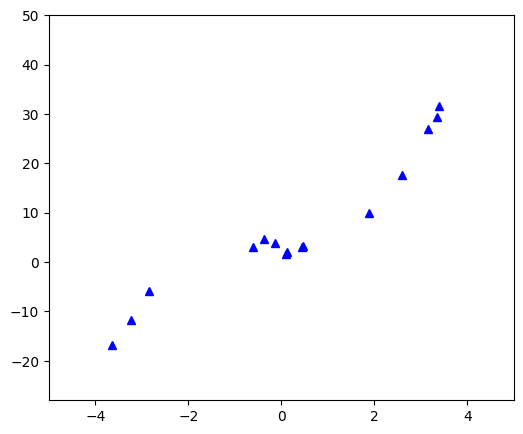

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

m = 20      # 20개의 데이터를 생성하자
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

# 20개의 데이터를 학습용 데이터, 테스트 데이터로 구분하자
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.figure(figsize=(6,5))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함
plt.plot(X_train, y_train, "b^")   # 학습용 데이터를 그리자

In [28]:
# 다항 회귀 모델을 만들고 점수와 계수, 절편을 출력
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 다항 특성이 20개가 되도록 하자
poly_features = PolynomialFeatures(degree = 20,\
                                   include_bias = False)
X_poly = poly_features.fit_transform(X_train)
regr = LinearRegression()
regr.fit(X_poly, y_train)

print('다항 회귀 모델의 점수 =', f"{regr.score(X_poly, y_train):.3f}")
print('다항 회귀 모델의 계수 =', regr.coef_)
print('절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 1.000
다항 회귀 모델의 계수 = [[-8.52463026e+00  9.55486449e+00  4.57427829e+01 -1.84819709e+01
  -4.59464058e+01 -2.99146566e+00 -2.35850480e+01  2.21005377e+00
  -7.01541674e+00  3.95713103e+00  8.91840610e-01  3.85752473e+00
   2.72043646e+00 -2.67249423e+00 -7.41732358e-01  5.20337276e-01
   6.71874571e-02 -4.10515583e-02 -2.01784467e-03  1.14873175e-03]]
절편 = [2.55275282]


In [29]:
# 테스트 데이터를 다항 회귀 모델의 입력으로 주고 예측 점수를 구해보자
X_poly = poly_features.fit_transform(X_test)

print('테스트 데이터에 대한 모델의 점수 =', regr.score(X_poly, y_test))

테스트 데이터에 대한 모델의 점수 = -14823.463729517538


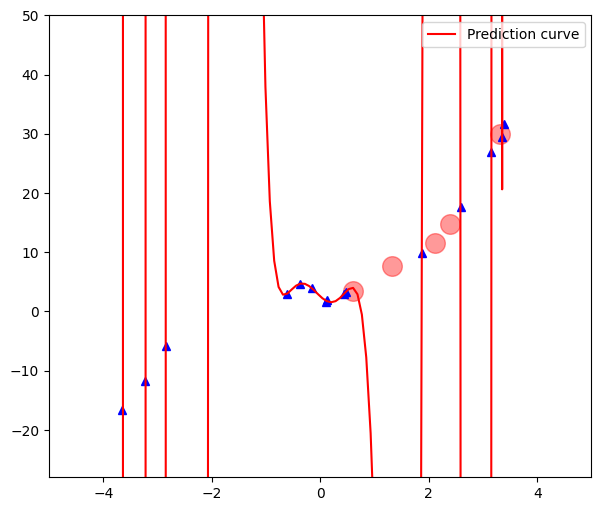

In [30]:
# 다항 회귀 곡선을 생성하는 기능
X_new = np.linspace(-4, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = regr.predict(X_new_poly)

plt.figure(figsize=(7,6))
plt.xlim(-5, 5); plt.ylim(-28, 50) # x, y 범위를 제한함

# 학습용 데이터와 다항 회귀 곡선을 그려보고 테스트 데이터도 그려보자
plt.plot(X_train, y_train, 'b^')
plt.scatter(X_test, y_test, c='red', s=200, alpha=0.4)
plt.plot(X_new, y_new, "r-", label="Prediction curve")
plt.legend()

### 8.10 과소 적합, 과대 적합, 그리고 규제

### 8.11 최적화와 규제항을 적용한 릿지 회귀

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 20개의 데이터를 생성하자
m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)
# 20개의 데이터를 학습용 데이터, 테스트 데이터로 구분하자
X_train, X_test, y_train, y_test = train_test_split(X, y)
# 다항 특성이 20개가 되도록 하자
poly_features = PolynomialFeatures(degree = 20,\
                                  include_bias = False)
X_train_pl = poly_features.fit_transform(X_train)
X_test_pl = poly_features.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train_pl, y_train)

print('훈련 데이터의 점수 =', f"{regr.score(X_train_pl, y_train):.3f}")
print('테스트 데이터의 점수 =', f"{regr.score(X_test_pl, y_test):.3f}")

훈련 데이터의 점수 = 1.000
테스트 데이터의 점수 = -283497.311


### 8.12 릿지 회귀와 alpha 값

In [32]:
### 규제를 추가해 보자 ##
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 규제가 있는 모델은 스케일러로 변환을 해야 함
ss.fit(X_train_pl)
train_scaled = ss.transform(X_train_pl)
test_scaled = ss.transform(X_test_pl)
### 릿지 회귀 ###
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train)
print('훈련 데이터의 점수 =', ridge.score(train_scaled, y_train))
print('테스트 데이터의 점수 =', ridge.score(test_scaled, y_test))

훈련 데이터의 점수 = 0.9626268221345833
테스트 데이터의 점수 = 0.8248199284671596


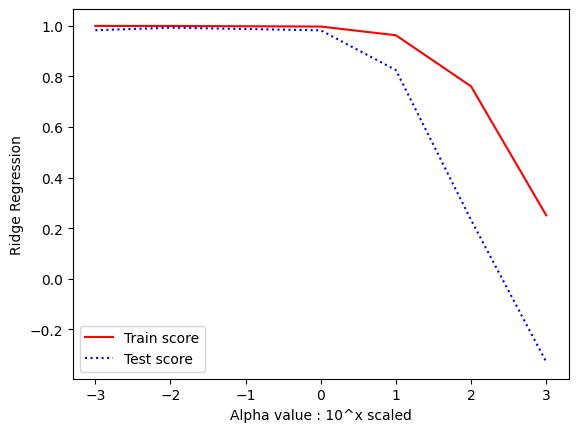

In [33]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
alpha_values = [0.001, 0.01, 1, 10, 100, 1000]
for a in alpha_values:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, y_train)
  train_scores.append(ridge.score(train_scaled, y_train))
  test_scores.append(ridge.score(test_scaled, y_test))

plt.plot(np.log10(alpha_values), train_scores, 'r-', label='Train score')
plt.plot(np.log10(alpha_values), test_scores, 'b:', label='Test score')
plt.xlabel('Alpha value : 10^x scaled')
plt.ylabel('Ridge Regression')
plt.legend(loc="lower left")